In [1]:
import pandas as pd
import numpy as np

In [2]:
sql09_res = pd.read_csv('./sql09_res.csv', parse_dates=['date', 'month'])
sql09_res.head()

,part_date,date,month,dau,pay_dau,paytotal_dau
0,2024-12-13,2024-12-13,2024-12-01,2338,126,107
1,2024-12-02,2024-12-02,2024-12-01,2379,156,145
2,2025-02-16,2025-02-16,2025-02-01,2319,150,127
3,2024-06-29,2024-06-29,2024-06-01,2610,169,159
4,2025-03-12,2025-03-12,2025-03-01,2216,115,87


In [3]:
sql09_res['pay_rate'] = sql09_res['pay_dau']/sql09_res['dau']
sql09_res['paytotal_rate'] = sql09_res['paytotal_dau']/sql09_res['dau']
sql09_res

,part_date,date,month,dau,pay_dau,paytotal_dau,pay_rate,paytotal_rate
0,2024-12-13,2024-12-13,2024-12-01,2338,126,107,0.053892,0.045766
1,2024-12-02,2024-12-02,2024-12-01,2379,156,145,0.065574,0.060950
2,2025-02-16,2025-02-16,2025-02-01,2319,150,127,0.064683,0.054765
3,2024-06-29,2024-06-29,2024-06-01,2610,169,159,0.064751,0.060920
4,2025-03-12,2025-03-12,2025-03-01,2216,115,87,0.051895,0.039260
...,...,...,...,...,...,...,...,...
329,2024-06-01,2024-06-01,2024-06-01,2692,231,219,0.085810,0.081352
330,2024-07-29,2024-07-29,2024-07-01,2448,195,192,0.079657,0.078431
331,2025-03-29,2025-03-29,2025-03-01,2325,107,90,0.046022,0.038710
332,2025-02-01,2025-02-01,2025-02-01,2391,142,119,0.059389,0.049770


In [79]:
py09_res = sql09_res.groupby(['month'])['paytotal_rate'].describe(percentiles=np.arange(0, 1, 0.1))

In [80]:
py09_res.to_csv('./py09_res.csv')

In [6]:
sql09_res.sort_values(['date'], inplace=True)

In [11]:
sql09_res['min'] = sql09_res['paytotal_rate'].rolling(window=30).min()
sql09_res['max'] = sql09_res['paytotal_rate'].rolling(window=30).max()
sql09_res['mean'] = sql09_res['paytotal_rate'].rolling(window=30).mean()
sql09_res['0.1'] = sql09_res['paytotal_rate'].rolling(window=30).quantile(0.5)
sql09_res['0.2'] = sql09_res['paytotal_rate'].rolling(window=30).quantile(0.2)
sql09_res['0.3'] = sql09_res['paytotal_rate'].rolling(window=30).quantile(0.3)
sql09_res['0.4'] = sql09_res['paytotal_rate'].rolling(window=30).quantile(0.4)
sql09_res['0.5'] = sql09_res['paytotal_rate'].rolling(window=30).quantile(0.5)
sql09_res['0.6'] = sql09_res['paytotal_rate'].rolling(window=30).quantile(0.6)
sql09_res['0.7'] = sql09_res['paytotal_rate'].rolling(window=30).quantile(0.7)
sql09_res['0.8'] = sql09_res['paytotal_rate'].rolling(window=30).quantile(0.8)
sql09_res['0.9'] = sql09_res['paytotal_rate'].rolling(window=30).quantile(0.9)

<Axes: xlabel='date'>

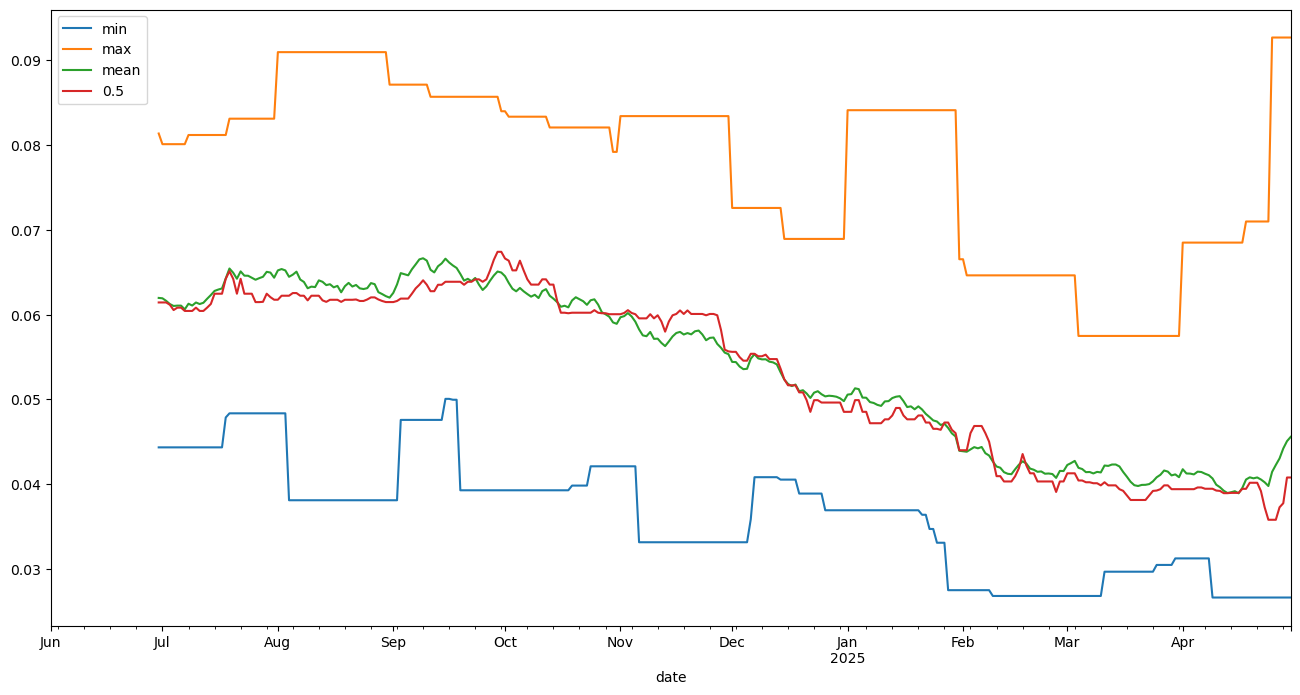

In [42]:
sql09_res.plot(x='date', y=['min', 'max', 'mean', '0.5'], figsize=(16, 8))

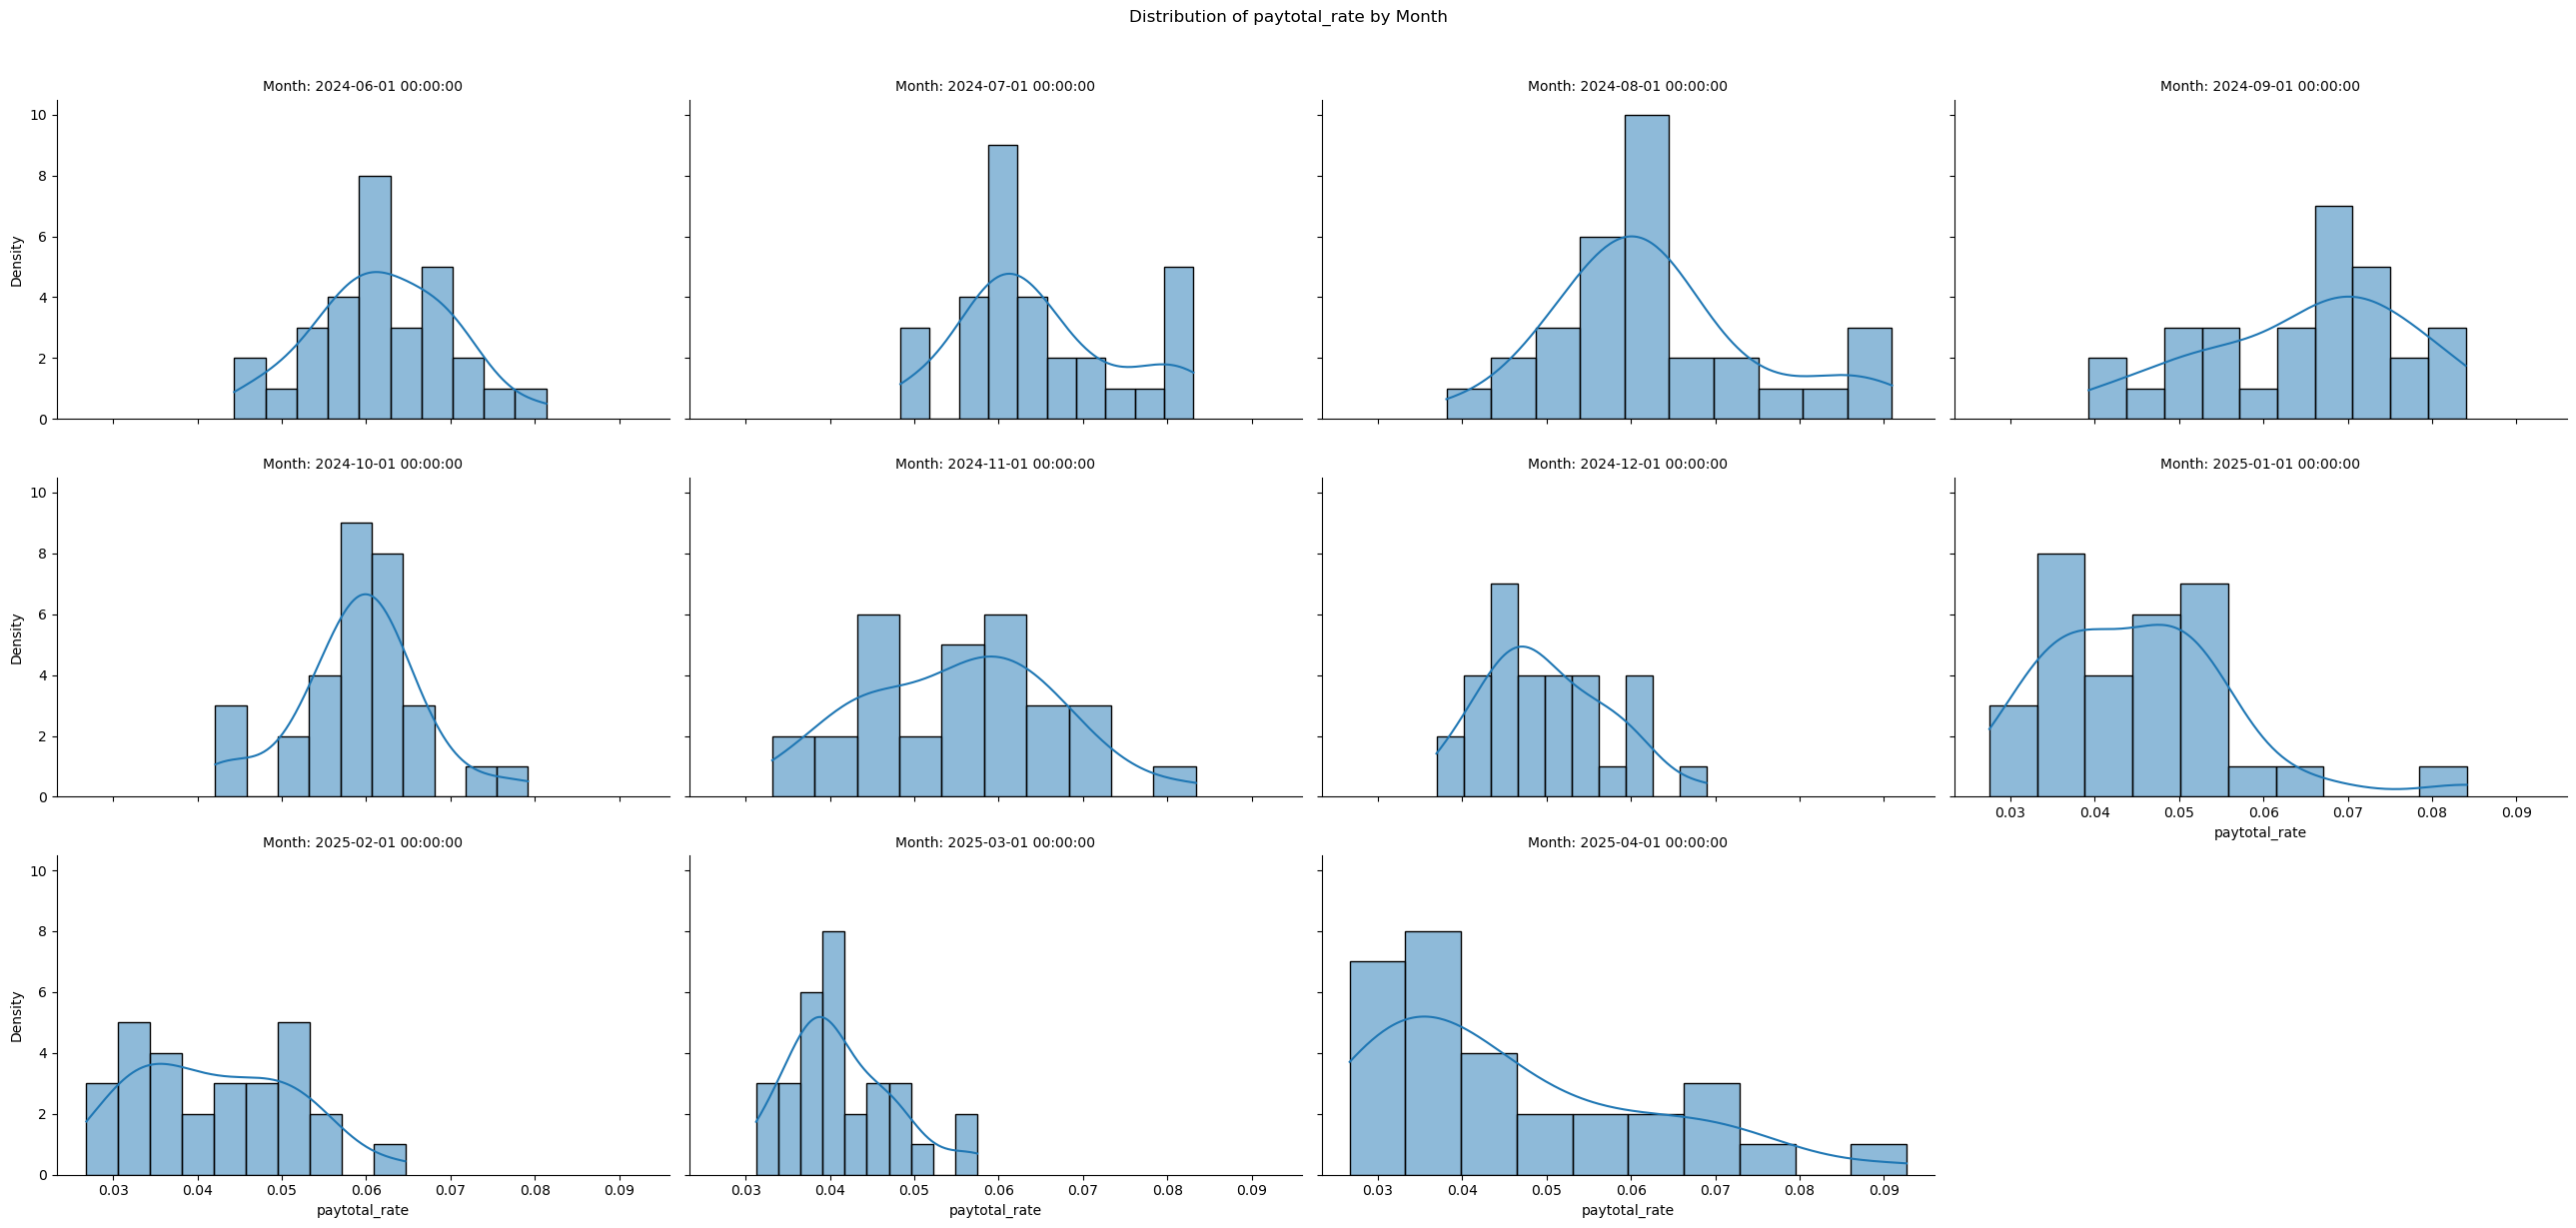

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# 创建分面网格
g = sns.FacetGrid(
    sql09_res, 
    col='month',  # 按月份分列
    col_wrap=4,   # 每行最多3个子图
    height=4,     # 子图高度
    aspect=1.618,   # 宽度/高度比
    sharex=True,  # 共享X轴
    sharey=True   # 共享Y轴
)

# 在每个子图上绘制KDE
g.map(sns.histplot, 'paytotal_rate', fill=True, bins=10, kde=True)

# 添加标题和调整布局
g.set_titles("Month: {col_name}")  # 子图标题
g.set_axis_labels("paytotal_rate", "Density")  # 统一轴标签
g.fig.suptitle("Distribution of paytotal_rate by Month", y=1.02)  # 总标题
plt.tight_layout()
plt.show()